Throughout this lesson, you've been trying different models on the same two datasets, wine and diabetes. Now, we're going to try our hand at accelerating this methodology by using AutoGluon. In this exercise, train two different AutonGluon models and see how they compare to previous iterations in exercise 1 and 2.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Create a AutoGluon Classifier model with these hyper parameters:
    1. time_limit: 120
    2. presets: best_quality
4. Output the model table summary
5. Evaluate the trained model on the test dataset
6. Load the diabetes dataset from scikit learn
7. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
8. Create a AutoGluon Regression model with these hyper parameters:
    1. eval_metric: r2
    2. time_limit: 120
    3. presets: best_quality
9. Output the model table summary
10. Evaluate the trained model on the test dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully u

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

## AutoGluon Classifier

In [4]:
# Load in the wine dataset
wine = datasets.load_wine()

In [5]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine['data'], columns=wine['feature_names'])

# Include the target as well
df['target'] = wine['target']

In [6]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [7]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a classifier, autogluon will pick it up
predictor = TabularPredictor(label='target').fit(
    train_data=df_train,
    time_limit=120,
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20211114_015136/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20211114_015136/"
AutoGluon Version:  0.3.1
Train Data Rows:    142
Train Data Columns: 13
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [2, 1, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3100.65 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set

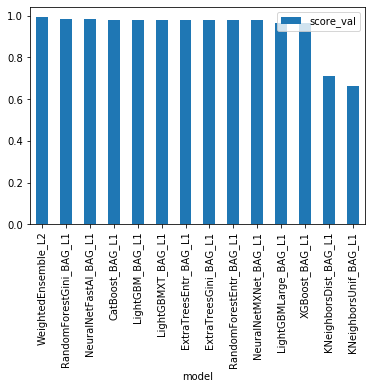

In [8]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [9]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.992958       0.333473  28.566760                0.000468           0.241420            2       True         14
1   RandomForestGini_BAG_L1   0.985915       0.073513   0.652667                0.073513           0.652667            1       True          6
2    NeuralNetFastAI_BAG_L1   0.985915       0.271440  19.849477                0.271440          19.849477            1       True          3
3           CatBoost_BAG_L1   0.978873       0.034107   6.164457                0.034107           6.164457            1       True          8
4           LightGBM_BAG_L1   0.978873       0.051864   3.516302                0.051864           3.516302            1       True          5
5         LightGBMXT_BAG_L1   0.978873       0.054715   3.698589                

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.6619718309859155,
  'KNeighborsDist_BAG_L1': 0.7112676056338029,
  'NeuralNetFastAI_BAG_L1': 0.9859154929577465,
  'LightGBMXT_BAG_L1': 0.9788732394366197,
  

In [10]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(df_test)

Evaluation: accuracy on test data: 0.9722222222222222
Evaluations on test data:
{
    "accuracy": 0.9722222222222222,
    "balanced_accuracy": 0.9791666666666666,
    "mcc": 0.9572184238576891
}


## AutoGluon Regression

In [11]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [12]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes['data'], columns=diabetes['feature_names'])

# Include the target as well
dfd['target'] = diabetes['target']

In [13]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=0)

In [14]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
# No need to explicitly say this is a regression, autogluon will pick it up
predictor = TabularPredictor(label='target', problem_type='regression', eval_metric='r2').fit(
    train_data=dfd_train,
    time_limit=120,
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20211114_015421/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 120s
AutoGluon will save models to "AutogluonModels/ag-20211114_015421/"
AutoGluon Version:  0.3.1
Train Data Rows:    353
Train Data Columns: 10
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2899.73 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 1 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerat

In [15]:
# Output the fit summary of the training run
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.547060       1.422985  46.715761                0.000417           0.285232            2       True         12
1        LightGBMXT_BAG_L1   0.545515       0.042252   6.487025                0.042252           6.487025            1       True          3
2          CatBoost_BAG_L1   0.522337       0.018265   3.977648                0.018265           3.977648            1       True          6
3          LightGBM_BAG_L1   0.520892       0.034731   4.553076                0.034731           4.553076            1       True          4
4     ExtraTreesMSE_BAG_L1   0.502246       0.076143   0.494905                0.076143           0.494905            1       True          7
5    NeuralNetMXNet_BAG_L1   0.494645       1.278817  39.937697                1.27881

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.43052099899418794,
  'KNeighborsDist_BAG_L1': 0.43970122394744415,
  'LightGBMXT_BAG_L1': 0.5455151362510066,
  'LightGBM_BAG_L1': 0.5208915141674362,
  'RandomForestMSE_BAG_L1': 0.4667434753086127,
  'CatBoost_BAG_L1': 0.5223368127289062,
  'ExtraTreesMSE_BAG_L1': 0.50

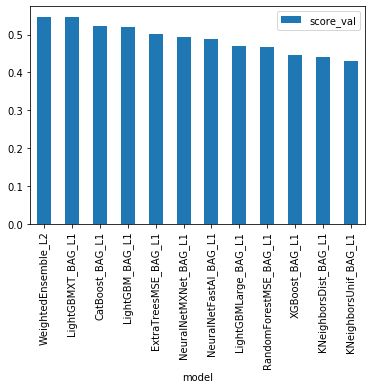

In [16]:
# Output the model's `score_val` in a bar chart to compare performance
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [17]:
# Evaluate the models performance on the test dataset
performance = predictor.evaluate(dfd_test)

Evaluation: r2 on test data: 0.3217452107025546
Evaluations on test data:
{
    "r2": 0.3217452107025546,
    "root_mean_squared_error": -58.974918964496005,
    "mean_squared_error": -3478.0410668688705,
    "mean_absolute_error": -44.47042898113808,
    "pearsonr": 0.5853789417407762,
    "median_absolute_error": -35.342254638671875
}
